In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [17]:
def save_png():
    pass



In [18]:
colors = {"lodówka": "limegreen", "zamrażarka": "blue", "półka": "gold", "szafka": "red"}
marker = "+"
linewidth=2.5

ticks = [
    datetime(2025, 3, 21),
    datetime(2025, 4, 1),
    datetime(2025, 4, 16),
    datetime(2025, 5, 1),
    datetime(2025, 5, 16),
    datetime(2025, 6, 1),
    datetime(2025, 6, 16),
    datetime(2025, 6, 30),
]
ticks.sort()                    # keep chronological order

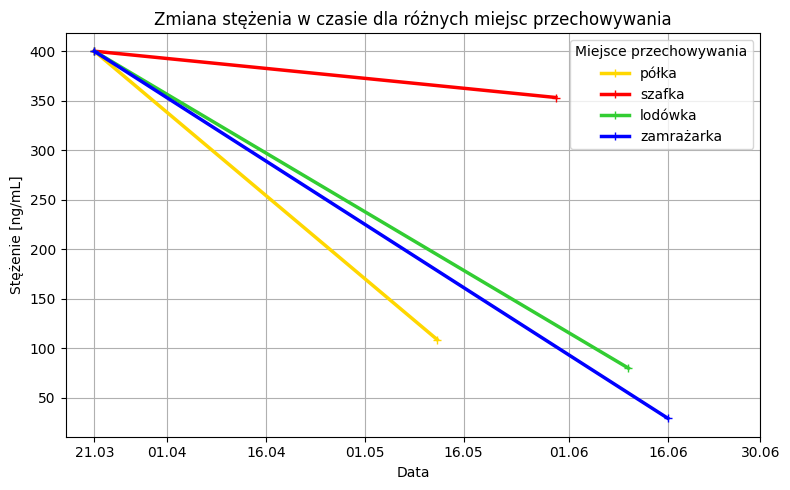

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

records = [
    ("półka",      "21.03.2025", 400),
    ("półka",      "12.05.2025", 108.92),
    ("szafka",     "21.03.2025", 400),
    ("szafka",     "30.05.2025", 353.25),
    ("lodówka",    "21.03.2025", 400),
    ("lodówka",    "10.06.2025", 80.13),
    ("zamrażarka", "21.03.2025", 400),
    ("zamrażarka", "16.06.2025", 29.41),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))


plt.figure(figsize=(8, 5))

for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker=marker,
        linewidth=linewidth,
        label=place,
        color=colors.get(place)           # default colour if not in dict
    )

plt.xlabel("Data")
plt.ylabel("Stężenie [ng/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania")
plt.grid(True)

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()  
plt.savefig("images/Stezenie-1-400ng.png")
plt.show()

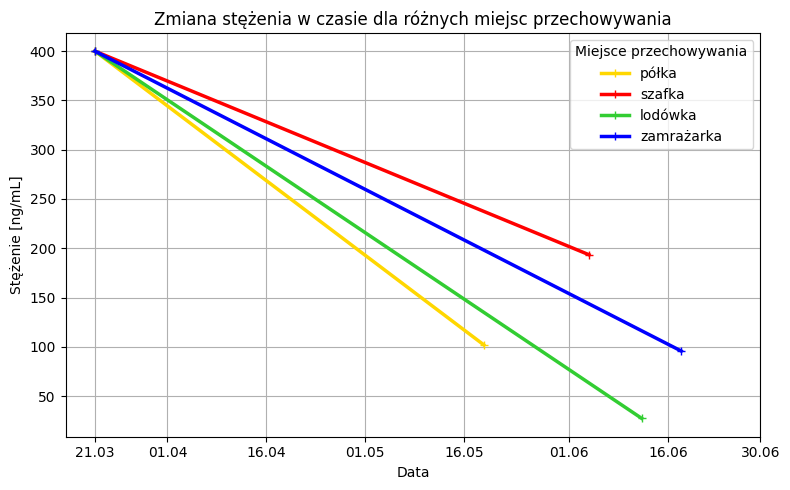

In [20]:
records = [
    ("półka",      "21.03.2025", 400),
    ("półka",      "19.05.2025", 102.13),
    ("szafka",     "21.03.2025", 400),
    ("szafka",     "04.06.2025", 193.43),
    ("lodówka",    "21.03.2025", 400),
    ("lodówka",    "12.06.2025", 27.38),
    ("zamrażarka", "21.03.2025", 400),
    ("zamrażarka", "18.06.2025", 95.74),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

plt.figure(figsize=(8, 5))
for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker=marker,
        linewidth=linewidth,
        label=place,
        color=colors.get(place) 
    )

plt.xlabel("Data")
plt.ylabel("Stężenie [ng/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania")
plt.grid(True)

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()  
plt.savefig("images/Stezenie-2-400ng.png")
plt.show()

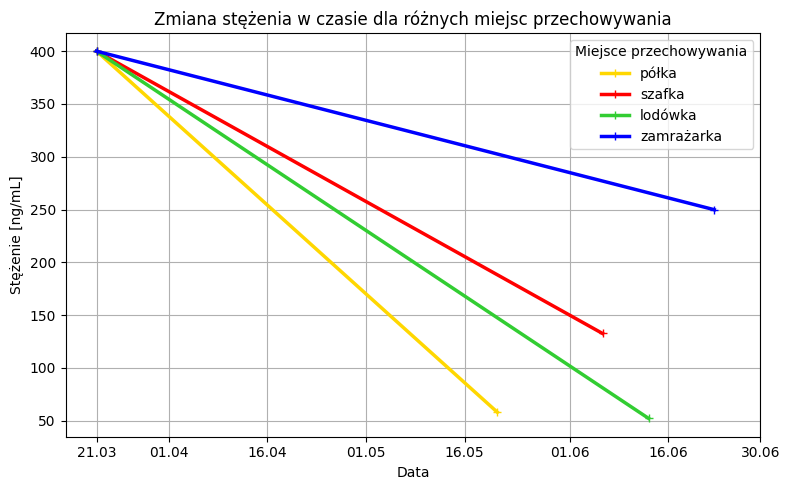

In [21]:
records = [
    ("półka",      "21.03.2025", 400),
    ("półka",      "21.05.2025", 57.91),
    ("szafka",     "21.03.2025", 400),
    ("szafka",     "06.06.2025", 132.55),
    ("lodówka",    "21.03.2025", 400),
    ("lodówka",    "13.06.2025", 52.13),
    ("zamrażarka", "21.03.2025", 400),
    ("zamrażarka", "23.06.2025", 249.83),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

plt.figure(figsize=(8, 5))
for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker=marker,
        linewidth=linewidth,
        label=place,
        color=colors.get(place) 
    )

plt.xlabel("Data")
plt.ylabel("Stężenie [ng/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania")
plt.grid(True)

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()  
plt.savefig("images/Stezenie-3-400ng.png")
plt.show()